c:\Users\xiao\anaconda\envs\xbd\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
c:\Users\xiao\anaconda\envs\xbd\Lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


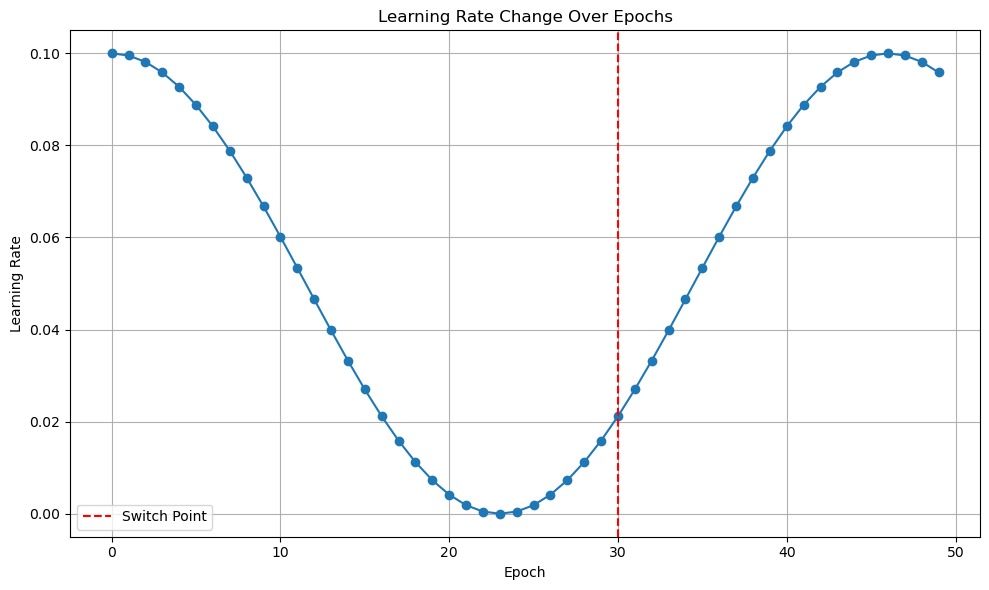

In [1]:
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR, ConstantLR, SequentialLR, CosineAnnealingLR, CosineAnnealingWarmRestarts
import matplotlib.pyplot as plt

# 创建一个简单的模型
model = torch.nn.Linear(10, 1)

# 初始化优化器
initial_lr = 0.1
optimizer = optim.Adam(model.parameters(), lr=initial_lr)

# 创建学习率调度器
cos_scheduler = CosineAnnealingLR(optimizer, T_max=23, verbose=True)
exp_scheduler = ExponentialLR(optimizer, gamma=0.98)
const_scheduler = ConstantLR(optimizer, factor=pow(0.98,30))
combined_scheduler = SequentialLR(
    optimizer,
    schedulers=[exp_scheduler, const_scheduler],
    milestones=[30]
)

# 记录学习率变化
lr_history = []
epochs = 50

for epoch in range(epochs):
    lr_history.append(optimizer.param_groups[0]['lr'])
    cos_scheduler.step()
    # combined_scheduler.step()

# 绘制学习率变化图
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), lr_history, marker='o')
plt.title('Learning Rate Change Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
#plt.yscale('log')  # 使用对数刻度以更好地显示变化
plt.grid(True)

# 添加切换点的垂直线
plt.axvline(x=30, color='r', linestyle='--', label='Switch Point')

plt.legend()
plt.tight_layout()
plt.show()